# Portfolio PCA

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## PortfolioPCA  Class
### * Using the Class object allows for versatile use of the analysis. The class can be applied to each data set individually and store its own relevant data. 
### * Methods within the class perform the PCA step by step with class instances that allow to keep and manipualte every step of the process.
### * Output DataFrames are kept unchanged, and formating is only performed at the end of each called method to allow for readily exportation of the data.
### * Each method has its own optional arguments to give maximum freedom when comparing changes in parameters.

#### Class admits a Matrix as input with observations in rows, and variables in columns. An optional argument  "covariance" can be added to indicate wether PCA will be performed on the covariance or correlation matrix; default is True.

In [2]:
class PortfolioPCA(object):
    def __init__(self,matrixdata,covariance=1):
        self.matrixform=matrixdata.to_numpy()
        self.columns=matrixdata.columns
        
        if covariance==True:
            target=np.cov(self.matrixform,rowvar=False)
        else:
            target=np.corrcoef(self.matrixform,rowvar=False)
        _,self.eigval,self.eigvec=np.linalg.svd(target,full_matrices=True)
        self.PC=self.matrixform.dot(self.eigvec.T)
        _,c=target.shape
        target2=np.concatenate([self.matrixform, self.PC],axis=1)
        self.correlations=np.corrcoef(target2,rowvar=False)[:c,c: 2*c]
    def pc_analysis(self,NumPC=None,threshold=0.3):
        if NumPC==None:
            NumPC=self.eigval.shape[0]
        lab=[]
        for i in range(1,NumPC+1):
            lab.append("PC"+" "+str(i))
        self.analysis=pd.DataFrame(self.correlations[:,:NumPC],\
                                index=self.columns,columns=lab)
        return self.analysis.style.apply(lambda x: ["background: blue" if abs(v) \
                                                       >=threshold else "" for v in x],\
                                            axis = 0).apply(lambda x: ['color: %s' % \
                                                                       'white' if abs(v) >=\
                                                                       threshold else "" for v in x]\
                                                            , axis = 0)

    def variance_explained(self,NumPC=None,threshold=None):
        if NumPC==None:
            NumPC=self.eigval.shape[0]
        if threshold==None:
            threshold=np.sum(self.eigval)*0.05
        lab=[]
        for i in range(1,NumPC+1):
            lab.append("PC"+" "+str(i))

        self.explained=np.concatenate([self.eigval[:NumPC].reshape(NumPC,1), \
                      self.eigval[:NumPC].reshape(NumPC,1)/np.sum(self.eigval), \
                      np.cumsum(self.eigval,axis=0)[:NumPC].reshape(NumPC,1)/\
                                       np.sum(self.eigval)],axis=1)
        self.explained=pd.DataFrame((self.explained),index=lab,\
                                    columns=['eValue','% Variance','Cumulative %'])
        
        def greyout(s, cutoff, column):
            is_max = pd.Series(data=False, index=s.index)
            is_max[column] = s.loc[column] <= threshold
            return ['color: %s' % 'grey' if is_max.any() else '' for v in is_max]
        return self.explained.style.apply(greyout, cutoff=threshold, column=['eValue'], axis=1).\
    format({'% Variance': '{:.2%}','Cumulative %':'{:.2%}'})
    
    def variance_chart(self,NumPC=None):
        if NumPC==None:
            NumPC=self.eigval.shape[0]
        lab=[]
        for i in range(1,NumPC+1):
            lab.append("PC"+" "+str(i))
        y=self.variance_explained(NumPC)
        fig, axis = plt.subplots( figsize=(11,7))
        fig.suptitle('Principal Components Chart',x=0.5 ,y=0.93)
        axis.plot( np.arange(1,NumPC+1), y.data['% Variance'], marker='o',\
                  markerfacecolor='red', markersize=9, color='black', \
                  linewidth=2,linestyle='--',label="Eigen Value")
        plt.grid(which='Major', axis='both', linestyle='-')
        axis.bar(np.arange(1,NumPC+1), y.data['% Variance'],label='% Variance Explained')
        axis.legend(title='Legend',loc='upper right');
        axis.set_xticks(np.arange(1,NumPC+1))
        axis.set_xticklabels(lab)
        axis.set_yticks(np.arange(0,1.1,0.1))
        axis.set_yticklabels(["{: d}%".format(m) for m in np.arange(0,110,10)])
        for m,n in enumerate(y.data['eValue']):
            axis.text((m+1)*0.97,0.012+ y.data['% Variance'][m], "{0:.3f}".\
                      format(y.data['eValue'][m]) ,color='red',fontsize=12,rotation=0)



## Examples

In [3]:
os.chdir("D:/jupyter_notebooks/csv")

#### a) ETF-Portfolio of 10 assets.

In [4]:
datos=pd.read_csv("ETFPortfolio.csv",sep=",",header=0)

In [5]:
datos.dropna(axis=0,how='all',inplace=True)

In [6]:
datos2=datos.drop(['Date'],axis=1)

In [7]:
a=PortfolioPCA(datos2)

In [8]:
a.pc_analysis()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
ITB,-0.939434,0.072905,0.273657,-0.162743,0.026662,-0.090056,0.022683,-0.037161,-0.004825,0.005964
IYZ,-0.088085,0.669660,-0.591106,0.320145,0.207571,-0.051059,0.073038,-0.196029,-0.048857,0.007456
XLY,-0.972230,-0.059768,0.196007,0.112804,0.003374,0.002459,-0.003144,0.001675,-0.003700,0.003204
XLP,-0.682270,0.590608,0.107782,-0.055431,0.396905,0.063065,-0.053690,0.073688,0.029561,-0.017398
IYT,-0.997140,-0.029426,-0.068577,-0.011061,-0.001676,0.000088,0.001774,0.003917,-0.000026,0.000250
PHO,-0.976155,0.135289,0.111737,0.013202,-0.068858,0.030805,0.000197,-0.051494,0.040147,-0.078775
DBA,0.746864,0.118745,-0.116334,0.274297,0.013333,-0.122207,0.348079,0.015597,0.441744,0.087572
DBB,-0.956685,0.115446,0.000197,-0.062343,-0.050132,0.109892,-0.190437,-0.106789,0.062520,0.037029
VNQ,-0.373024,0.901226,-0.056676,0.070175,-0.104877,-0.162094,-0.038549,0.041779,0.001218,0.001390
LQD,-0.681486,0.674122,0.141394,-0.066038,-0.072359,0.218487,0.058404,0.001339,-0.015788,0.012189


In [9]:
a.variance_explained()

,eValue,% Variance,Cumulative %
PC 1,586.462977,93.52%,93.52%
PC 2,23.342225,3.72%,97.24%
PC 3,10.327424,1.65%,98.89%
PC 4,2.847358,0.45%,99.34%
PC 5,1.536293,0.24%,99.59%
PC 6,1.461073,0.23%,99.82%
PC 7,0.449361,0.07%,99.89%
PC 8,0.370433,0.06%,99.95%
PC 9,0.210296,0.03%,99.99%
PC 10,0.087767,0.01%,100.00%


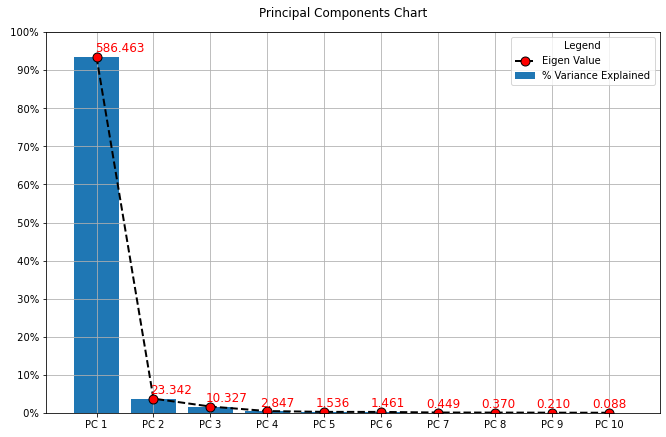

In [10]:
a.variance_chart()

### Any kind of data can be admitted. In this case, we input a cross-sectional matrix.

In [11]:
texto=pd.read_csv('places.txt', delim_whitespace=True,header=None)

In [12]:
texto.drop([9],axis=1,inplace=True)

In [13]:
logtexto=texto.apply(lambda x: np.log(x)/np.log(10),axis=1)

In [14]:
b=PortfolioPCA(logtexto,covariance=False)

In [15]:
b.pc_analysis()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9
0,-0.232407,0.011263,-0.909391,0.164872,-0.088457,-0.100278,-0.068621,-0.216662,0.115580
1,-0.612245,-0.137519,-0.160024,-0.217445,0.377886,-0.416852,-0.245264,-0.335514,0.355505
2,-0.793663,-0.756124,-0.034477,-0.251851,-0.093558,-0.895697,-0.457665,-0.726903,0.240428
3,-0.429025,0.346375,-0.251584,-0.284238,-0.766614,-0.275069,-0.287384,-0.051477,0.276329
4,-0.645430,-0.322858,0.128027,-0.716732,-0.228872,-0.326270,0.097310,-0.520984,0.373192
5,-0.420162,-0.466825,0.130938,-0.025998,-0.117672,-0.342425,-0.179285,-0.360832,0.168455
6,-0.948253,-0.477848,-0.098065,-0.656091,-0.107564,-0.835345,-0.577428,-0.891055,0.866490
7,-0.596903,0.134138,-0.116576,-0.718033,0.240645,-0.155234,-0.686860,-0.453993,0.359687
8,-0.197116,0.340466,0.397728,0.107060,-0.038009,-0.092108,-0.074552,-0.111864,0.112011


In [16]:
b.variance_explained()

,eValue,% Variance,Cumulative %
PC 1,3.297793,36.64%,36.64%
PC 2,1.213562,13.48%,50.13%
PC 3,1.105530,12.28%,62.41%
PC 4,0.907280,10.08%,72.49%
PC 5,0.860629,9.56%,82.05%
PC 6,0.562186,6.25%,88.30%
PC 7,0.483821,5.38%,93.68%
PC 8,0.318072,3.53%,97.21%
PC 9,0.251128,2.79%,100.00%


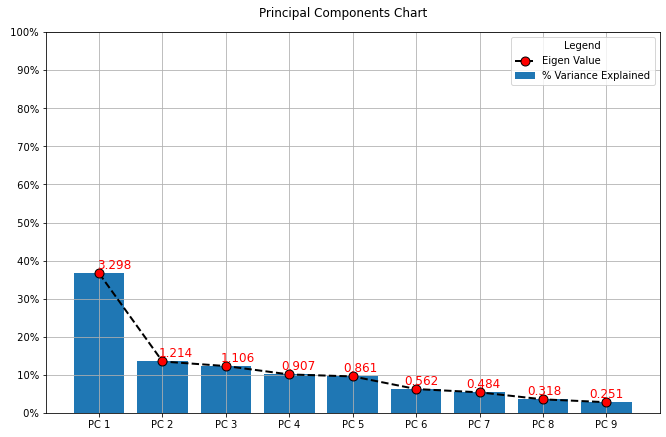

In [17]:
b.variance_chart()